In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Linear Regression
## 1. Notations
$\DeclareMathOperator{\argmin} {arg min}
\DeclareMathOperator{\argmax} {arg max}$
- Let $m\in\mathbb{N}^*$ the number of features.
- Let $n \in \mathbb{N}^*$ the number of samples
- Let $E=\mathbb{R}^m$ the vector space of features
- Let $F=\mathbb{R}^k$ the vector space of target values
- Let $P=\mathbb{R}^{m+1}$ be a vector space in which the parameters vary
- For $\omega \in P$, we will denote $w_*=(w_1,\dots,w_n)$
- We will denote by $\mathbb{1}_i \in \mathbb{R}^i $ the vector of ones $\forall i \in \mathbb{N}$ 
- Let $X \in E^n$ be a tuple of input samples 
- Let $y \in \mathbb{R}^n$ be a tuple of samples 
- Let $\alpha \in \mathbb{R}_+$ be a hyperparameter
- Let $\mathscr{N}=\lVert\cdot\rVert$ be a norm on $E$
- Let $d$ be a distance function on $\mathbb{R}^n$
- Let $\mathscr{L} \in \mathscr{F}\left(P,\mathbb{R}\right)/$
$$\forall \omega \in P,\quad \mathscr{L}(\omega)=d\left(X\omega_*+\omega_0\mathbb{1},Y\right)+\alpha\lVert \omega_*\rVert$$
## 2. Objective
We will try to find: $$\omega_m=\arg\min_{\omega\in P} d\left(X\omega_*+\omega_0\mathbb{1},Y\right)+\alpha\lVert \omega_*\rVert$$
## 3. Minimizing $\mathscr{L}$ for the Euclidean distance & $\alpha=0$
Because $\mathscr{L}$ is positive, minimizing $\mathscr{L}$ is the same as minimizing $\mathscr{L}^2=\mathscr{L}\cdot\mathscr{L}$, but because $\mathscr{L}^2$ is a quadratic form, it is guaranteed that it has at least 1 minimum. 
In reality it does have exactly 1 minimum most of the time
$$ \dfrac{\partial \mathscr{L}^2}{\partial \omega}=\dfrac{\partial \lVert Y- X\omega_*-\omega_0\mathbb{1}\rVert_2^2}{\partial \omega}=\dfrac{\partial \lVert Y- X\omega_*-\omega_0\mathbb{1}\rVert_2^2}{\partial \left(Y- X\omega_*-\omega_0\mathbb{1}\right)} \dfrac{\partial \left(Y- X\omega_*-\omega_0\mathbb{1}\right)}{\partial \omega} = -2\left(Y-X\omega_*-\omega_0 \mathbb{1} \right)^T
\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix}\\
\implies \dfrac{\partial \mathscr{L}^2}{\partial \omega}= \boldsymbol{0} \iff \left(Y-X\omega_*-\omega_0 \mathbb{1} \right)^T
\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix} \iff \left(Y-\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix}\omega \right)^T
\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix}$$
Let $U=\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix}$, We have then:
$$ \dfrac{\partial \mathscr{L}^2}{\partial \omega}= \boldsymbol{0} \iff  \left(Y-U\omega\right)^TU=\boldsymbol{0} \iff U^TU\omega=U^TY$$ 
### 3.1 $U^TU$ is inversible $\iff$ $U$ is injective
We have then: $$ \dfrac{\partial \mathscr{L}^2}{\partial \omega}= \boldsymbol{0} \iff \omega=\left(U^TU\right)^{-1}U^TY $$
### 3.2 $U^TU$ is singular
In this situation, many solutions exist, we introduce the Moore-Penrose inverse to solve this problem.
The Moore-Penrose inverse is unique:
$$\omega=\left(U^TU\right)^+U^TY $$
Even though the solution is not unique, that solution is the one with the smallest norm
### 3.3 General case:
Because the Moore-Penrose inverse is a generalisation of the inverse, we can write
$$\omega=\left(U^TU\right)^+U^TY $$

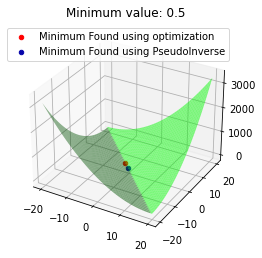

In [40]:
X=np.array([[1,1],[-1,-1]])
Y=np.array([0,1])
W = np.arange(-20, 20, 0.05)
B = np.arange(-20, 20, 0.05)
W, B = np.meshgrid(W, B)
L=0
for i in range(2):
    L =L +(Y[i]-X[i,0]*B-X[i,1]*W)**2
w_min = scipy.optimize.minimize(lambda w:np.sum((Y-X@w)**2),x0=np.random.normal(0,5,2)).x
f_min=np.sum((Y-X@w_min)**2)
w_0=np.linalg.pinv(X.T@X)@X.T@Y
f_0=np.sum((Y-X@w_0)**2)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(W, B, L, 
                       linewidth=1, antialiased=True,color=(0,1,0,.5))
ax.scatter(*w_min,f_min,color="r",antialiased=True,label="Minimum Found using optimization")
ax.scatter(*w_0,f_0,color="xkcd:royal blue",antialiased=True,label="Minimum Found using PseudoInverse")
ax.set_title("Minimum value: {}".format(f_min))
ax.legend()

In [144]:
def mul_flat(A,u,shape):
    np.reshape(u,shape)
    return A@np.reshape(u,shape)

def MoorePenroseInv(A):
    shape=list(reversed(A.shape))
    return np.reshape(scipy.optimize.minimize(lambda a:np.linalg.norm(mul_flat(A,a,shape)-np.eye(A.shape[0]),ord="fro"),x0=np.ndarray.flatten(A)).x,shape)

In [148]:
MoorePenroseInv(np.array([[3,0],[0,2]]))

array([[3.33333333e-01, 9.43864659e-10],
       [7.10618176e-10, 4.99999992e-01]])

In [133]:
print([1,2,3,4])

[1, 2, 3, 4]
[1, 2, 3, 4]


In [1]:
np

NameError: name 'np' is not defined